
# Практическая работа №2: Исследование задач о раскрасках

Выполнил студент гр. 9381 Фоминенко Артемий, вариант 63.

## Цель работы

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения

### Действие группы на множество

Пусть $G$ - группа, $X$ - множество. $G$ действует на $X$, если задана операция $G \times X \to X$, обладающая следующими свойствами:  
$\forall x \in X$ и $\forall g,h \in G$  
1) $g(hx) = (gh)x$  
2) $ex = x$


### Орбиты и неподвижные точки

Орбитой $x \in X$ под действием $G$ называется множество из элементов, в которые переходят $x$ под действием $G$.  
$Gx = \{gx | g \in G\}$.  
Длина орбиты - количество элементов в орбите. Любые две орбиты либо не пересекаются, либо совпадают.

Множество неподвижных точек элемента $g \in G$ - это такие $x \in X$, которые под действием элемента не изменяются.  
$X^g = \{x\in X | gx = x\}$

### Лемма Бёрнсайда

Количество орбит действия группы $G$ на множестве $X$:  
$N = \frac{1}{|G|}\sum_{g \in G} |X^{g}|$

### Раскраски

Пусть $I$ - произвольное множество, $C$ - множество цветов. Раскраской $I$ называется отображение $I$ в $C$. Множество всех раскрасок обозначим как $C^I$.  

Количество раскрасок из $C^{I}$, не меняющиеся под действием $g \in G$ равно $|C|^{c(\varphi(g))}$, где:  
$c(\varphi(g))$ - количество независимых циклов в перестановке $\varphi(g)$ (включая циклы длины 1).  

## Постановка задачи

Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.

## Условие задачи

Плоскость разбита на одинаковые правильные треугольники со стороной единица. Одна из вершин одного из треугольников обозначена через А. Пусть Х - множество всех вершин, которые удалены от А на расстояние не больше, чем 3. Каждую точку из Х красят в один из 3 цветов. Сколькими способами можно составить такую раскраску (с точностью до поворотов и осевых симметрий плоскости)?

## Порядок выполнения работы

1) Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно проинтерпретировать.  
2) Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.  
3) *Дополнительное необязательное задание: для заданного варианта решить задачу в общем виде.*  


## Выполнение работы

Проиллюстрируем картину, описанную в условии:  


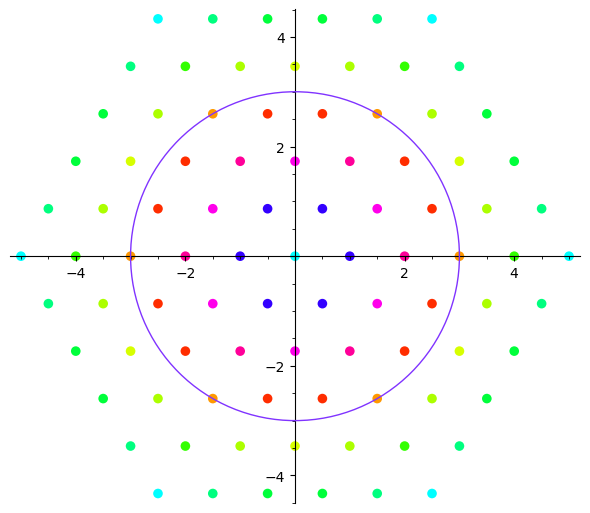

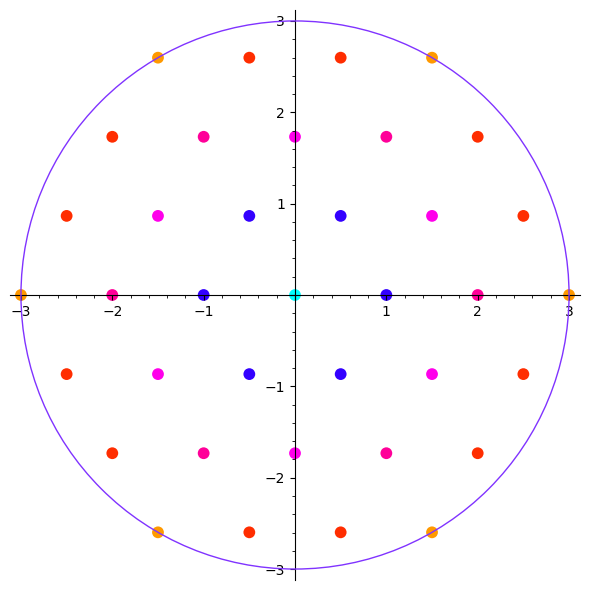

In [1]:
import random

colorsAmount = 3; dist = 5; hueStart = 0.5; hueMult = 0.2; pointSize = 48
#точка - список вида [x-координата, y-координата, цвет]


def make_point_color(x, y, option="circle"):
    if option == "random":
        return random.randint(1, colorsAmount)
    if option == "circle":
        return sqrt(x*x+y*y)
    return 0


def draw_picture(pointsList):
    G = Graphics()
    points = point([])
    for p in pointsList:
        points += point([[p[0],p[1]]], hue=(hueStart + hueMult*p[2]), size=pointSize)
    G += points
    G += circle([0,0],3, rgbcolor=(0.5,0.2,1))
    G.show(figsize=[6,6])
    return G
        

def make_points_list(colorOption="circle"):
    pointsList = []
    
    for x in srange(-dist, dist+1):
        for y in srange(-dist, dist+1):
            xx = x if y%2==0 else x+0.5
            yy = y * sqrt(3)/2
            if sqrt(xx*xx + yy*yy) <= abs(dist):
                col = make_point_color(xx, yy, colorOption)
                pointsList.append([xx,yy,col])
            
    return pointsList
    
    
pointsList = make_points_list(colorOption="circle")
draw_picture(pointsList)
dist = 3
pointSize = 72
pointsList = make_points_list(colorOption="circle")
picture = draw_picture(pointsList)


Из полученного видим, что внутри окружности можно выделить правильные шестиугольники радиуса от 1 до 3 , которые пересекают все точки, соответствующие условию. 

На рисунке эти шестиугольники видны по цвету точек (1 - синий, 2 - розовый, 3 - оранжевый). 

Таким образом, задача сводится к исследованию симметрий правильных шестиугольников.

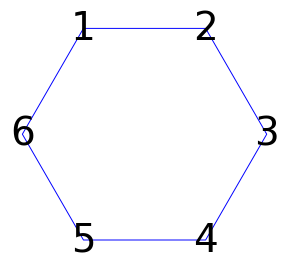

In [2]:
hexagon1List = [[-0.5, sqrt(3)/2], [0.5, sqrt(3)/2], [1, 0], 
                [0.5, -sqrt(3)/2], [-0.5, -sqrt(3)/2], [-1, 0], 
                [-0.5, sqrt(3)/2]]
hexagon = polygon(hexagon1List, fill=False, thickness=0.7, color="blue")
txt = Graphics()
for i in range(1, len(hexagon1List)):
    txt += text("{}".format(i), hexagon1List[i-1], horizontal_alignment="center", color="black", fontsize=28)
(txt+hexagon).show(figsize=[3,3], axes=False)


Группа симметрий правильного шестиугольника имеет 12 элементов: тождественное преобразование ($e$), 5 поворотов на 60,120,180,240,300 градусов ($r,r^2,r^3,r^4,r^5$), а также 6 отражений относительно 6 осей симметрии ($s,sr,sr^2,sr^3,sr^4,sr^5$). Условимся, что $r,r^2..r^5$ - повороты по часовой стрелке, $s$ - отражение относительно горизонтальной оси.

Согласно лемме Бёрнсайда, необходимо найти независимые циклы каждого из элементов группы симметрий. Для начала опишем независимые циклы для шестиугольника радиуса 1; он пересекает 6 точек, которые расположились ровно на его вершинах:  
1) $e$: каждая точка будет оставаться на месте, образуя циклы длины 1: $(1)(2)..(6)$. Итого $6$ циклов.  
2) $r$: каждая точка будет переходить в соседнюю справа, образуя единственный цикл длины 6: $(123456)$. Итого $1$ цикл.  
3) $r^2$: точки будут "ходить" по двум треугольникам, образуя циклы длины 3: $(135)(126)$. Итого $2$ цикла.  
4) $r^3$: точки будут "ходить" попарно по трём отрезкам, образуя циклы длины 2: $(14)(25)(36)$. Итого $3$ цикла.  
5) $r^4$: ситуация, аналогичная $r^2$: $(153)(264)$. Итого $2$ цикла.  
6) $r^5$: ситуация, аналогичная $r$: $(165432)$. Итого $1$ цикл.  
7) $s$: две точки на горизонтальной оси никуда не передвинутся, остальные четыре образуют две пары, отражающиеся относительно горизонтали: $(15)(24)(3)(6)$. Итого $4$ цикла.  
8) $sr$: это отражение относительно оси, проходящей через левую верхнюю и правую нижнюю стороны; точки попарно отображаются друг в друга: $(16)(25)(34)$. Итого $3$ цикла.  
9) $sr^2$: это отражение относительно оси, проходящей через левую верхнюю и правую нижнюю вершины; две точки остаются на местах, остальные четыре попарно отображаются друг в друга: $(1)(26)(35)(4)$. Итого $4$ цикла.  
10) $sr^3$: это отражение относительно вертикальной оси; точки попарно отображаются друг в друга: $(12)(36)(45)$. Итого $3$ цикла.  
11) $sr^4$: это отражение относительно оси, проходящей через правую верхнюю и левую нижнюю вершины; две точки остаются на местах, остальные четыре попарно отображаются друг в друга: $(13)(2)(46)(5)$. Итого $4$ цикла.  
12) $sr^5$: это отражение относительно оси, проходящей через правую верхнюю и левую нижнюю стороны; точки попарно отображаются друг в друга: $(14)(23)(56)$. Итого $3$ цикла.  


Таким образом, по лемме Бёрнсайда имеем:  
$N = \frac{1}{12}(2*3^{1} + 2*3^{2} + 4*3^{3} + 3*3^{4} + 3^{6})$  - количество различных раскрасок вершин шестиугольника.

Внимательно рассмотрев шестиугольник радиуса 2, можно заметить, что точки, пересекамые им, образуют два независимых шестиугольника. То есть количество независимых циклов для каждого элемента группы вырастает в 2 раза.  

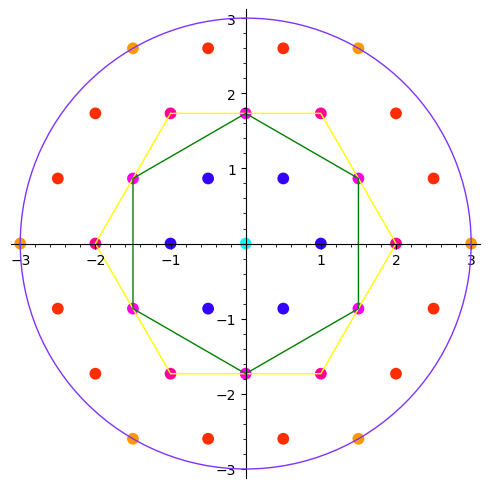

In [3]:
hexagon21List = [[-1, sqrt(3)], [1, sqrt(3)], [2, 0], 
                 [1, -sqrt(3)], [-1, -sqrt(3)], [-2, 0], 
                 [-1, sqrt(3)]]
hexagon22List = [[0, sqrt(3)], [1.5, sqrt(3)/2], [1.5, -sqrt(3)/2], 
                 [0, -sqrt(3)], [-1.5, -sqrt(3)/2], [-1.5, sqrt(3)/2], 
                 [0, sqrt(3)]]
hexagon21 = polygon(hexagon21List, fill=False, thickness=1, color="yellow")
hexagon22 = polygon(hexagon22List, fill=False, thickness=1, color="green")
(picture+hexagon21+hexagon22).show(figsize=[5,5])


Для случая шестиугольников радиуса 3, количество независимых циклов вырастет в 3 раза.  

Суммируем: $1+2+3=6$ - во столько раз вырастет количество независимых циклов для каждого элемента группы симметрий шестиугольника.  

По лемме Бёрнсайда:  
### способов составить 3-цветную раскраску точек требуемого множества:
$$N = \frac{1}{12}(2*3^{6} + 2*3^{12} + 4*3^{18} + 3*3^{24} + 3^{36})$$


Симметрии рандомно раскрашенного множества:
Тождественное преобразование:


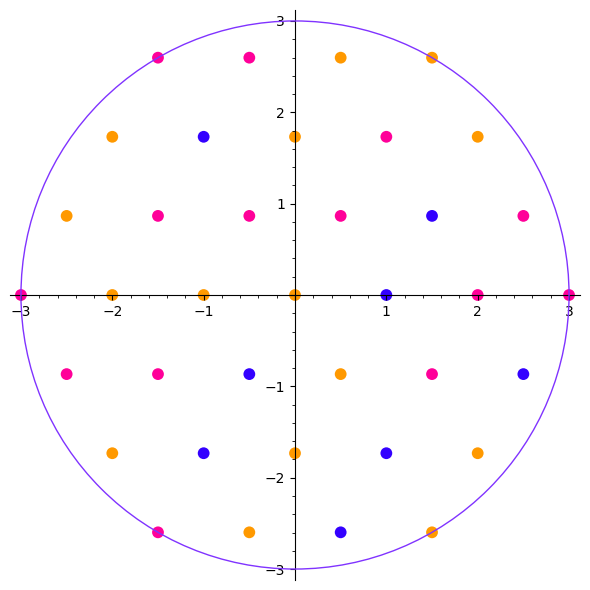

Поворот на 60 градусов:


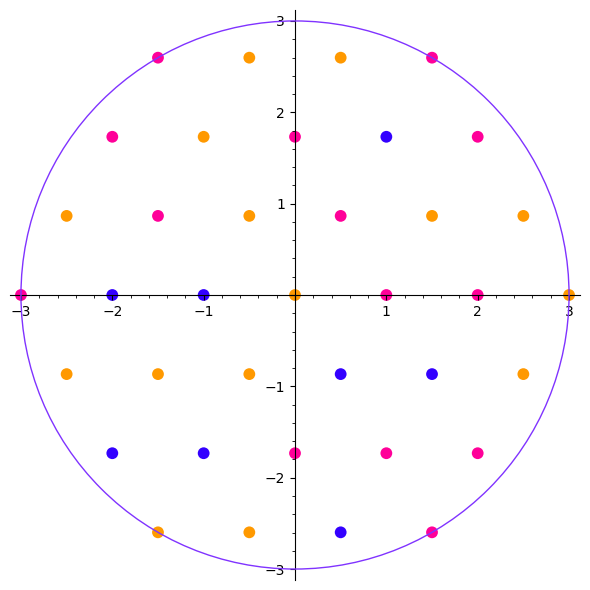

Поворот на 120 градусов:


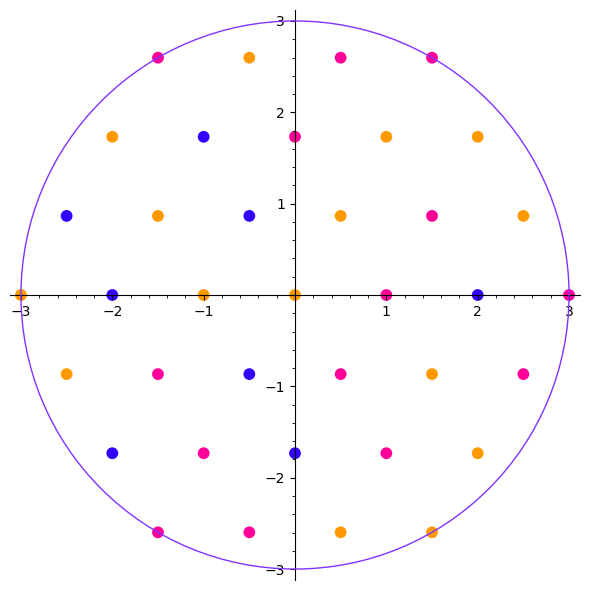

Поворот на 180 градусов:


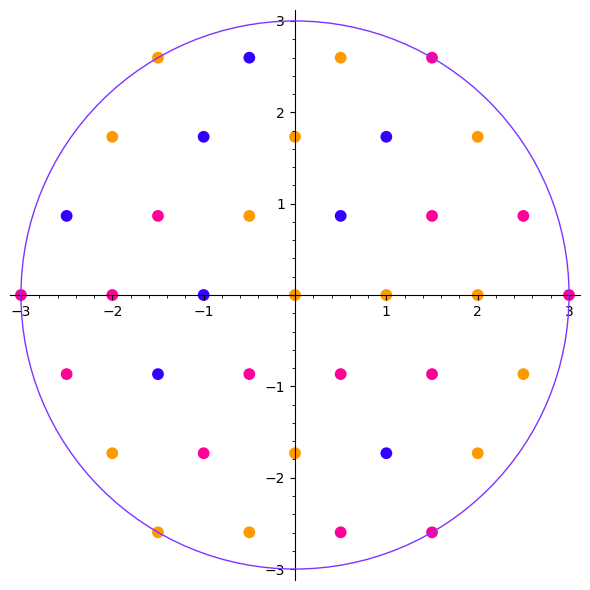

Поворот на 240 градусов:


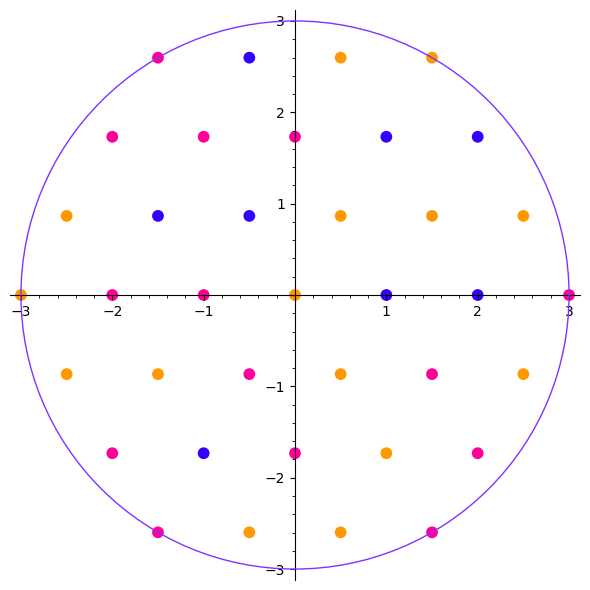

Поворот на 300 градусов:


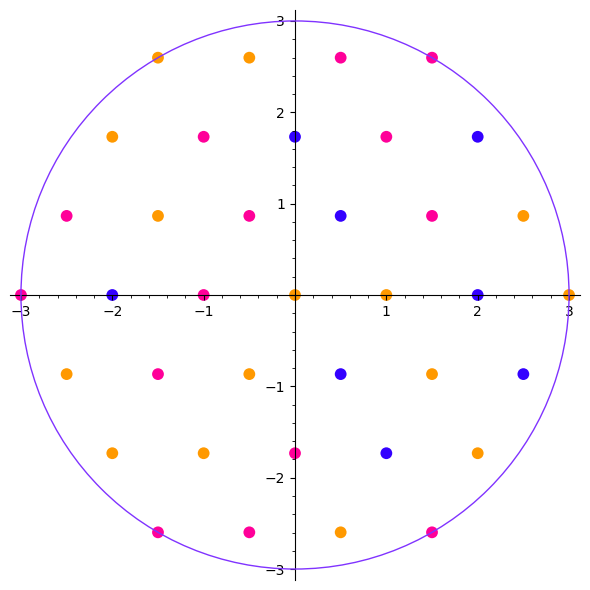

Отражение относительно горизонтальной оси:


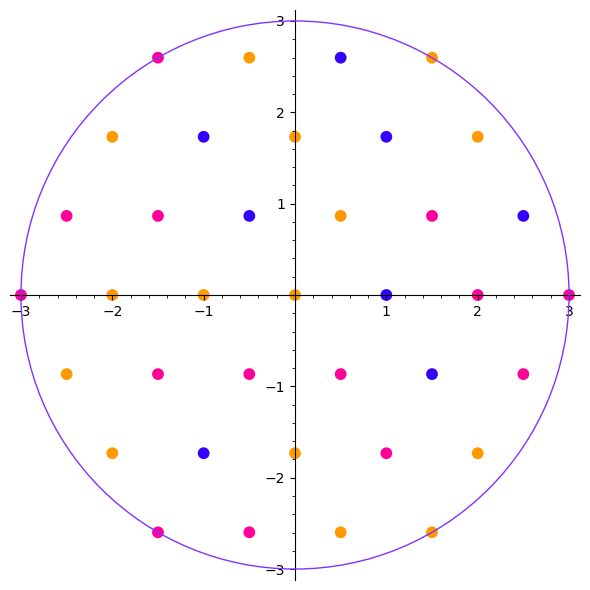

Отражение относительно оси проходящей через левую верхнюю и правую нижнюю стороны:


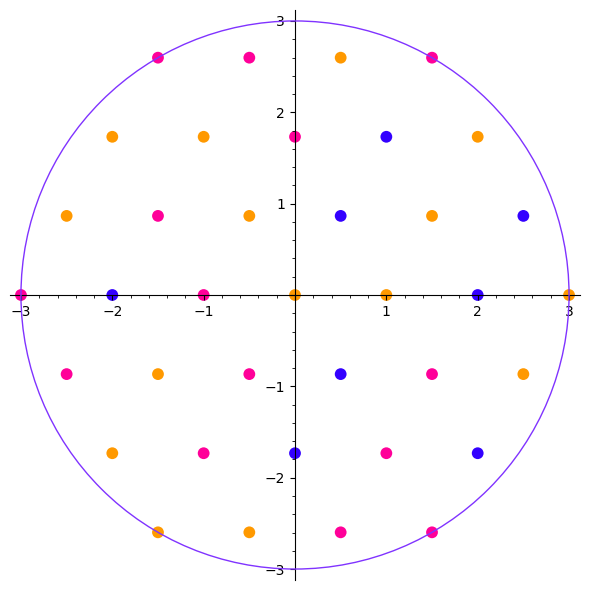

Отражение относительно оси проходящей через левую верхнюю и правую нижнюю вершины:


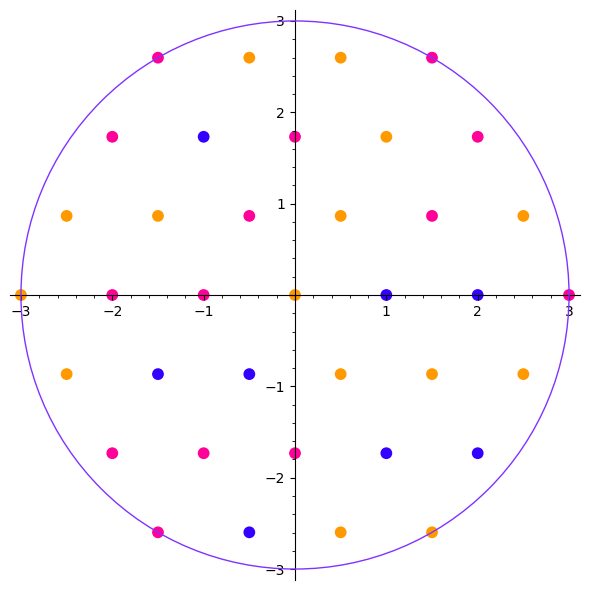

Отражение относительно вертикальной оси:


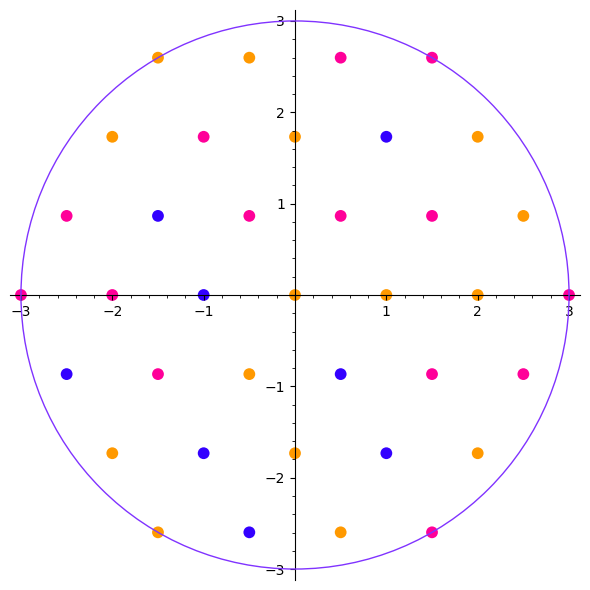

Отражение относительно оси проходящей через правую верхнюю и левую нижнюю вершины:


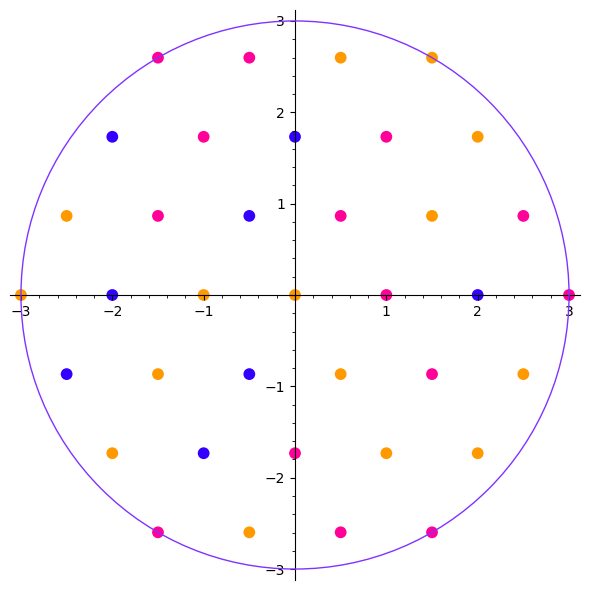

Отражение относительно оси проходящей через правую верхнюю и левую нижнюю стороны:


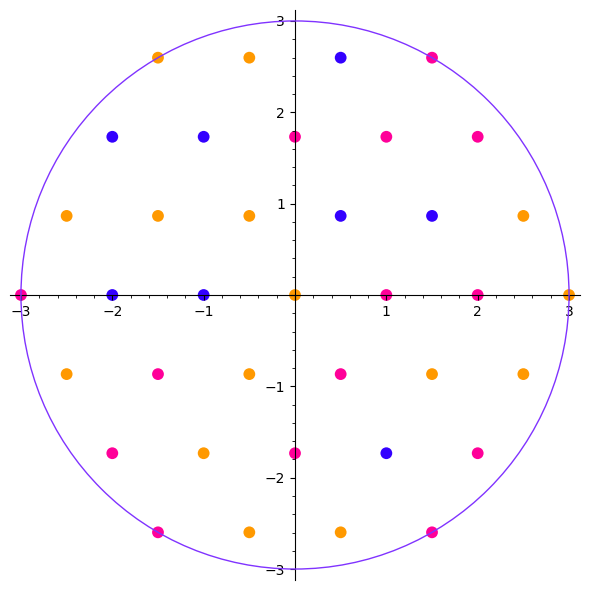

In [4]:
def rotated(pointsList):
    alpha = -pi/3 # по часовой стрелке на 60 градусов
    rotatedPointsList = []
    
    for p in pointsList:
        x = p[0]*cos(alpha) - p[1]*sin(alpha)
        y = p[0]*sin(alpha) + p[1]*cos(alpha)
        rotatedPointsList.append([x,y,p[2]])
    
    return rotatedPointsList


def reflected(pointsList):
    reflectedPointsList = []
    
    for p in pointsList:
        x = p[0]
        y = -p[1] # отражение относительно горизонтали
        reflectedPointsList.append([x,y,p[2]])
        
    return reflectedPointsList


def draw_all_symmetries():
    print("Симметрии рандомно раскрашенного множества:")
    pointsList = make_points_list(colorOption="random")
    print("Тождественное преобразование:")
    draw_picture(pointsList)
    print("Поворот на 60 градусов:")
    draw_picture(rotated(pointsList))
    print("Поворот на 120 градусов:")
    draw_picture(rotated(rotated(pointsList)))
    print("Поворот на 180 градусов:")
    draw_picture(rotated(rotated(rotated(pointsList))))
    print("Поворот на 240 градусов:")
    draw_picture(rotated(rotated(rotated(rotated(pointsList)))))
    print("Поворот на 300 градусов:")
    draw_picture(rotated(rotated(rotated(rotated(rotated(pointsList))))))
    print("Отражение относительно горизонтальной оси:")
    draw_picture(reflected(pointsList))
    print("Отражение относительно оси проходящей через левую верхнюю и правую нижнюю стороны:")
    draw_picture(rotated(reflected(pointsList)))
    print("Отражение относительно оси проходящей через левую верхнюю и правую нижнюю вершины:")
    draw_picture(rotated(rotated(reflected(pointsList))))
    print("Отражение относительно вертикальной оси:")
    draw_picture(rotated(rotated(rotated(reflected(pointsList)))))
    print("Отражение относительно оси проходящей через правую верхнюю и левую нижнюю вершины:")
    draw_picture(rotated(rotated(rotated(rotated(reflected(pointsList))))))
    print("Отражение относительно оси проходящей через правую верхнюю и левую нижнюю стороны:")
    draw_picture(rotated(rotated(rotated(rotated(rotated(reflected(pointsList)))))))
    
    
draw_all_symmetries()


### Задача в общем виде
C - цветов

N - макс. расстояние

Получаем по лемме Бёрнсайда:  

$N = \frac{1}{12}(2*N^{1} + 2*N^{2} + 4*N^{3} + 3*N^{4} + N^{6})$  - количество различных раскрасок вершин шестиугольника.

$y = \dfrac{(N+1)N}{2}$ - во столько раз вырастет количество независимых циклов для каждого элемента группы симметрий шестиугольника. 

### способов составить 3-цветную раскраску точек требуемого множества:
$$N = \frac{1}{12}(2*N^{y} + 2*N^{2y} + 4*N^{3y} + 3*N^{4y} + N^{6y})$$

## Выводы

Были изучены элементы теории групп, в частности действия групп на множествах. Была применена лемма Бернсайда для установления количества различных раскрасок заданного множества, а также были улучшены навыки пользования системой компьютерной алгебры.